In [1]:
import pandas as pd
from tabulate import tabulate
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
import json
import os
import ast


# Parsing json data
def parseDataRQ1(data):
    experiment = data.pop('experiment_properties')
    dataInSamples = {}
    l3 = data
    for l2, l2_data in l3.items():
        # Extract accuracy data
        accuracy_data = {l1: [runs["accuracy"]/100 for runs in l1_data.values()] for l1, l1_data in l2_data.items()}
        # Extract precision data
        precision_data = {l1: [runs["precision"] for runs in l1_data.values()] for l1, l1_data in l2_data.items()}
        # Extract recall data
        recall_data = {l1: [runs["recall"] for runs in l1_data.values()] for l1, l1_data in l2_data.items()}
        # Extract f1-score data
        f1_data = {l1: [runs["f1-score"] for runs in l1_data.values()] for l1, l1_data in l2_data.items()}

        accuracy_df = pd.DataFrame(accuracy_data, index=list(l2_data.values())[0].keys())
        precision_df = pd.DataFrame(precision_data, index=list(l2_data.values())[0].keys())
        recall_df = pd.DataFrame(recall_data, index=list(l2_data.values())[0].keys())
        f1_score_df = pd.DataFrame(f1_data, index=list(l2_data.values())[0].keys())
        
        # Calculate averages
        averages = {}
        for l1, l1_data in l2_data.items():
            avg_accuracy = sum(run_data["accuracy"] for run_data in l1_data.values()) / len(l1_data) / 100
            avg_precision = sum(run_data["precision"] for run_data in l1_data.values()) / len(l1_data)
            avg_recall = sum(run_data["recall"] for run_data in l1_data.values()) / len(l1_data)
            avg_f1_score = sum(run_data["f1-score"] for run_data in l1_data.values()) / len(l1_data)
            averages[l1] = {"accuracy": avg_accuracy, "precision": avg_precision, "recall": avg_recall, "f1-score": avg_f1_score}

        average_df = pd.DataFrame(averages)
        dataInSamples[l2]= {'average_df':average_df, 'accuracy_df':accuracy_df, 'precision_df':precision_df, 'recall_df':recall_df, 'f1_score_df':f1_score_df}
    return experiment, dataInSamples



def parseDataRQ3(data):
    experiment = data.pop('experiment_properties')
    dataInSamples = {}
    l4 = data
    for l3, l3_data in l4.items():
        for l2, l2_data in l3_data.items():
            # Extract accuracy data
            accuracy_data = {l1: [runs["accuracy"]/100 for runs in l1_data.values()] for l1, l1_data in l2_data.items()}
            # Extract precision data
            precision_data = {l1: [runs["precision"] for runs in l1_data.values()] for l1, l1_data in l2_data.items()}
            # Extract recall data
            recall_data = {l1: [runs["recall"] for runs in l1_data.values()] for l1, l1_data in l2_data.items()}
            # Extract f1-score data
            f1_data = {l1: [runs["f1-score"] for runs in l1_data.values()] for l1, l1_data in l2_data.items()}

            accuracy_df = pd.DataFrame(accuracy_data, index=list(l2_data.values())[0].keys())
            precision_df = pd.DataFrame(precision_data, index=list(l2_data.values())[0].keys())
            recall_df = pd.DataFrame(recall_data, index=list(l2_data.values())[0].keys())
            f1_score_df = pd.DataFrame(f1_data, index=list(l2_data.values())[0].keys())
            
            # Calculate averages
            averages = {}
            for l1, l1_data in l2_data.items():
                avg_accuracy = sum(run_data["accuracy"] for run_data in l1_data.values()) / len(l1_data) / 100
                avg_precision = sum(run_data["precision"] for run_data in l1_data.values()) / len(l1_data)
                avg_recall = sum(run_data["recall"] for run_data in l1_data.values()) / len(l1_data)
                avg_f1_score = sum(run_data["f1-score"] for run_data in l1_data.values()) / len(l1_data)
                averages[l1] = {"accuracy": avg_accuracy, "precision": avg_precision, "recall": avg_recall, "f1-score": avg_f1_score}

            average_df = pd.DataFrame(averages)
            dataInSamples[l3+' - '+l2]= {'average_df':average_df, 'accuracy_df':accuracy_df, 'precision_df':precision_df, 'recall_df':recall_df, 'f1_score_df':f1_score_df}
    return experiment, dataInSamples



In [2]:
# Plotting lines with Margin function
def plotLines(experiment, average_df, accuracy_df, precision_df, recall_df, f1_score_df, marginAlpha=0.3, title='Test', rq=1):
    plt.figure(figsize=(10, 6))
    color = ['blue','orange','green','red']
    if rq == 1:
        x = np.array(ast.literal_eval(experiment['Percentage scenarios']))
    elif rq == 2:
        x = np.array(ast.literal_eval(experiment['Variants']))
    elif rq == 3:
        x = np.array(ast.literal_eval(experiment['Standard Deviation scenarios']))
    # x = np.arange(len(average_df.columns))
    x_smooth = np.linspace(x.min(), x.max(), 100)
    
    # Plot accuracy
    y = average_df.loc['accuracy']
    f = interpolate.interp1d(x, y, kind='cubic')
    y_smooth = f(x_smooth)
    plt.plot(x_smooth, y_smooth, label='accuracy', color=color[0])
    # print(accuracy_df.min(axis=0))
    y1th = accuracy_df.min(axis=0)
    f = interpolate.interp1d(x, y1th, kind='cubic')
    y1th_smooth = f(x_smooth)
    y2th = accuracy_df.max(axis=0)
    f = interpolate.interp1d(x, y2th, kind='cubic')
    y2th_smooth = f(x_smooth)
    plt.fill_between(x_smooth, y1th_smooth, y2th_smooth, color=color[0], alpha=marginAlpha)
    
    # Plot precision
    y = average_df.loc['precision']
    f = interpolate.interp1d(x, y, kind='cubic')
    y_smooth = f(x_smooth)
    plt.plot(x_smooth, y_smooth, label='precision', color=color[1])
    y1th = precision_df.min(axis=0)
    f = interpolate.interp1d(x, y1th, kind='cubic')
    y1th_smooth = f(x_smooth)
    y2th = precision_df.max(axis=0)
    f = interpolate.interp1d(x, y2th, kind='cubic')
    y2th_smooth = f(x_smooth)
    plt.fill_between(x_smooth, y1th_smooth, y2th_smooth, color=color[1], alpha=marginAlpha)

    # Plot recall
    y = average_df.loc['recall']
    f = interpolate.interp1d(x, y, kind='cubic')
    y_smooth = f(x_smooth)
    plt.plot(x_smooth, y_smooth, label='recall', color=color[2])
    y1th = recall_df.min(axis=0)
    f = interpolate.interp1d(x, y1th, kind='cubic')
    y1th_smooth = f(x_smooth)
    y2th = recall_df.max(axis=0)
    f = interpolate.interp1d(x, y2th, kind='cubic')
    y2th_smooth = f(x_smooth)
    plt.fill_between(x_smooth, y1th_smooth, y2th_smooth, color=color[2], alpha=marginAlpha)

    # Plot recall
    y = average_df.loc['f1-score']
    f = interpolate.interp1d(x, y, kind='cubic')
    y_smooth = f(x_smooth)
    plt.plot(x_smooth, y_smooth, label='f1-score', color=color[3])
    # y1th = f1_score_df.loc['1th run']
    y1th = f1_score_df.min(axis=0)
    f = interpolate.interp1d(x, y1th, kind='cubic')
    y1th_smooth = f(x_smooth)
    # y2th = f1_score_df.loc['2th run']
    y2th = f1_score_df.max(axis=0)
    f = interpolate.interp1d(x, y2th, kind='cubic')
    y2th_smooth = f(x_smooth)
    plt.fill_between(x_smooth, y1th_smooth, y2th_smooth, color=color[3], alpha=marginAlpha)

    # xgrid = np.linspace(x.min(), x.max(), 5)
    # xgrid = sorted(set(np.append(x,xgrid).round()))
    # print(xgrid)
    # print(x)
    plt.grid(True, which='both', linestyle='-', linewidth=0.5, color='gray')  # Normal grid
    plt.xticks(x, [str(scenario) for scenario in x])  # Set x-axis tick locations

    
    plt.title(title)
    if rq == 1:
        plt.xlabel('Percentage Mapping')
    elif rq == 2:
        plt.xlabel('Number Of Variants')
    elif rq == 3:
        plt.xlabel('Standard Deviation Values')
    plt.ylabel('Progress')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plotting Bars function
def plotBars(average_df, alpha=0.5, title='Test', rq=1):
    color = ['blue','orange','green','red']
    # Plotting the data
    average_df.plot(kind='bar', figsize=(10, 6), color=color, alpha=alpha)
    plt.title(title)
    if rq == 1:
        plt.xlabel('Percentage Mapping')
    elif rq == 2:
        plt.xlabel('Number Of Variants')
    elif rq == 2:
        plt.xlabel('Standard Deviation Values')
    plt.ylabel('Progress')
    plt.xticks(rotation=0)
    plt.legend(title='Metric')
    plt.grid(axis='y')
    plt.show()

# Plotting Boxes function
def plotBoxs(data, title="Test", rq=1):
    data.boxplot(sym='o',               # Symbol to use for outliers
                 patch_artist=True,     # Whether to fill the boxes with colors
                 meanline=True,         # Whether to show the mean as a line
                 showmeans=False,       # Whether to show the mean as a point
                 showcaps=True,         # Whether to show caps on the ends of whiskers
                 showbox=True,          # Whether to show the box
                 showfliers=True,       # Whether to show outliers
                 widths=0.1,            # Width of the boxes
                 figsize=(10, 6),       # Size of the figure
                 grid=True,             # Whether to show grid lines

                 boxprops=dict(color='blue'),          # Color of the box
                 whiskerprops=dict(color='green'),     # Color of the whiskers
                 capprops=dict(color='red'),           # Color of the caps
                 medianprops=dict(color='orange'),     # Color of the median line
                 flierprops=dict(markerfacecolor='purple', marker='o', markersize=8),  # Color and style of outliers
                 )
    plt.title(title)
    plt.ylabel('Values')
    if rq == 1:
        plt.xlabel('Percentage Mapping')
    elif rq == 2:
        plt.xlabel('Number Of Variants')
    elif rq == 2:
        plt.xlabel('Standard Deviation Values')
    plt.show()

In [5]:
with open(os.path.dirname(os.getcwd())+'/data/result/rq1/1_experiment_result.json', 'r') as file:
    datarq1 = json.load(file)
with open(os.path.dirname(os.getcwd())+'/data/result/2_2_experement_result.json', 'r') as file:
    datarq2 = json.load(file)
with open(os.path.dirname(os.getcwd())+'/data/result/3_experement_result.json', 'r') as file:
    datarq3 = json.load(file)

experimentrq1, dataInSamplesrq1 = parseDataRQ1(datarq1)
experimentrq2, dataInSamplesrq2 = parseDataRQ1(datarq2)
experimentrq3, dataInSamplesrq3 = parseDataRQ3(datarq3)
print("RQ1", experimentrq1)
for k, d in dataInSamplesrq1.items():
    print('average_df')
    print(tabulate(d['average_df'], headers='keys', tablefmt='psql'))
    print('accuracy_df')
    print(tabulate(d['accuracy_df'], headers='keys', tablefmt='psql'))
    print('precision_df')
    print(tabulate(d['precision_df'], headers='keys', tablefmt='psql'))
    print('recall_df')
    print(tabulate(d['recall_df'], headers='keys', tablefmt='psql'))
    print('f1_score_df')
    print(tabulate(d['f1_score_df'], headers='keys', tablefmt='psql'))
print("RQ2", experimentrq2)
for k, d in dataInSamplesrq2.items():
    print('average_df')
    print(tabulate(d['average_df'], headers='keys', tablefmt='psql'))
    print('accuracy_df')
    print(tabulate(d['accuracy_df'], headers='keys', tablefmt='psql'))
    print('precision_df')
    print(tabulate(d['precision_df'], headers='keys', tablefmt='psql'))
    print('recall_df')
    print(tabulate(d['recall_df'], headers='keys', tablefmt='psql'))
    print('f1_score_df')
    print(tabulate(d['f1_score_df'], headers='keys', tablefmt='psql'))
print("RQ3", experimentrq3)
for k, d in dataInSamplesrq3.items():
    print('average_df')
    print(tabulate(d['average_df'], headers='keys', tablefmt='psql'))
    print('accuracy_df')
    print(tabulate(d['accuracy_df'], headers='keys', tablefmt='psql'))
    print('precision_df')
    print(tabulate(d['precision_df'], headers='keys', tablefmt='psql'))
    print('recall_df')
    print(tabulate(d['recall_df'], headers='keys', tablefmt='psql'))
    print('f1_score_df')
    print(tabulate(d['f1_score_df'], headers='keys', tablefmt='psql'))

RQ1 {'Percentage scenarios': '[1, 5, 15, 25, 50]', 'Variants': '[5]', 'Runs': 3}
average_df
+-----------+----------+----------+----------+----------+----------+
|           |       1% |       5% |      15% |      25% |      50% |
|-----------+----------+----------+----------+----------+----------|
| accuracy  | 0.592976 | 0.667606 | 0.806384 | 0.883428 | 0.979605 |
| precision | 0.995451 | 0.996687 | 0.996976 | 0.997242 | 0.999206 |
| recall    | 0.54334  | 0.629053 | 0.783473 | 0.871241 | 0.977798 |
| f1-score  | 0.702555 | 0.771243 | 0.877382 | 0.92995  | 0.988385 |
+-----------+----------+----------+----------+----------+----------+
accuracy_df
+---------+----------+----------+----------+----------+----------+
|         |       1% |       5% |      15% |      25% |      50% |
|---------+----------+----------+----------+----------+----------|
| 1th run | 0.624038 | 0.672199 | 0.816019 | 0.886534 | 0.980642 |
| 2th run | 0.565112 | 0.676519 | 0.80682  | 0.872049 | 0.977434 |
| 3th run

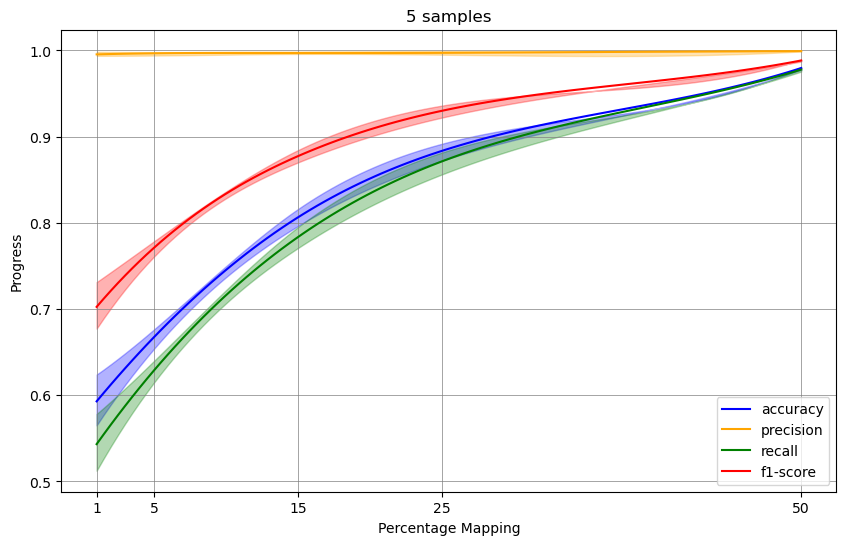

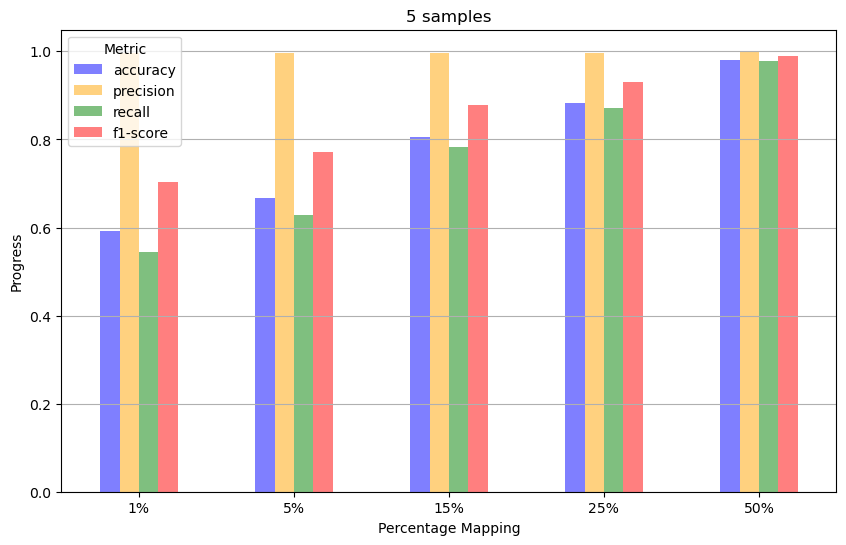

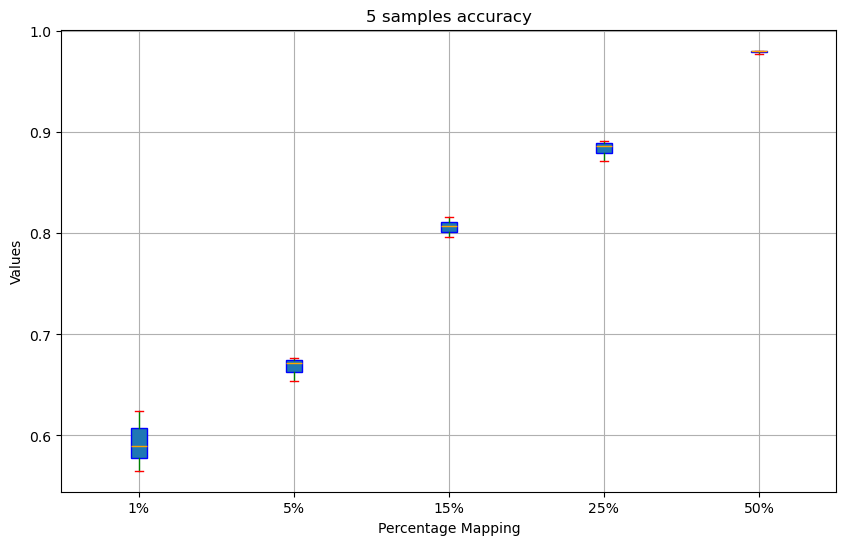

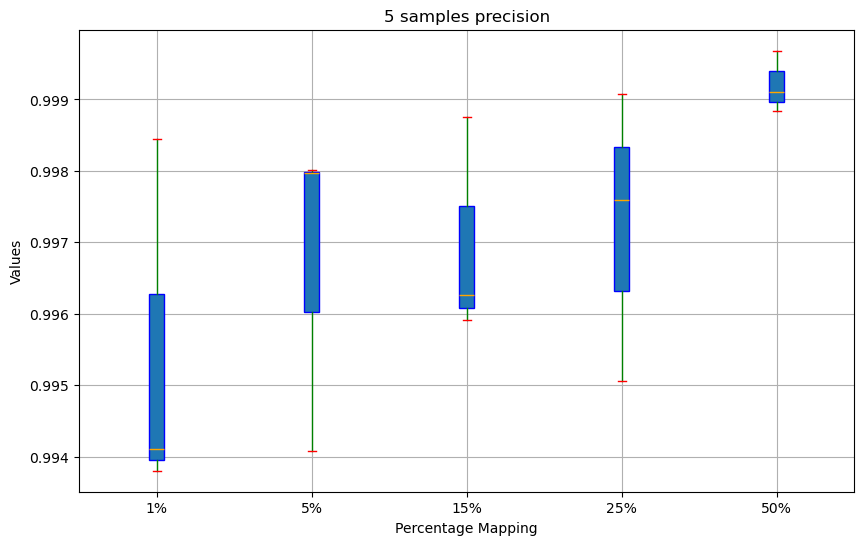

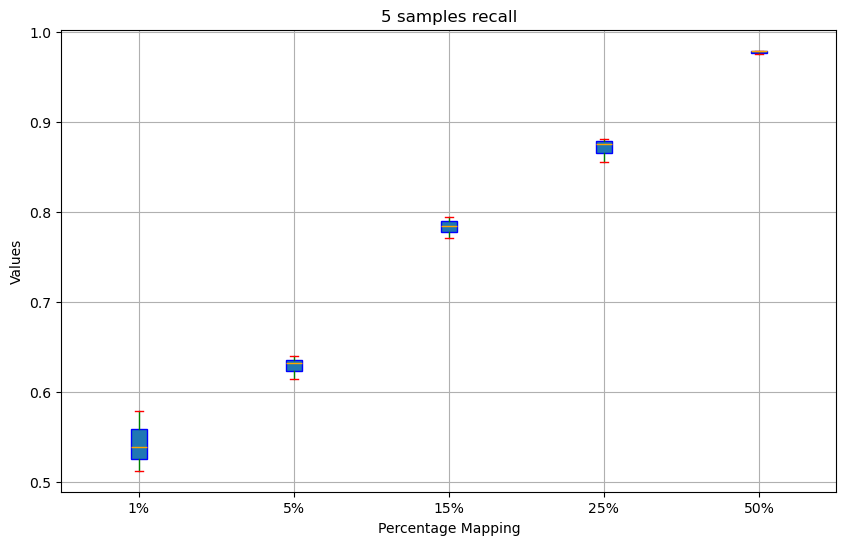

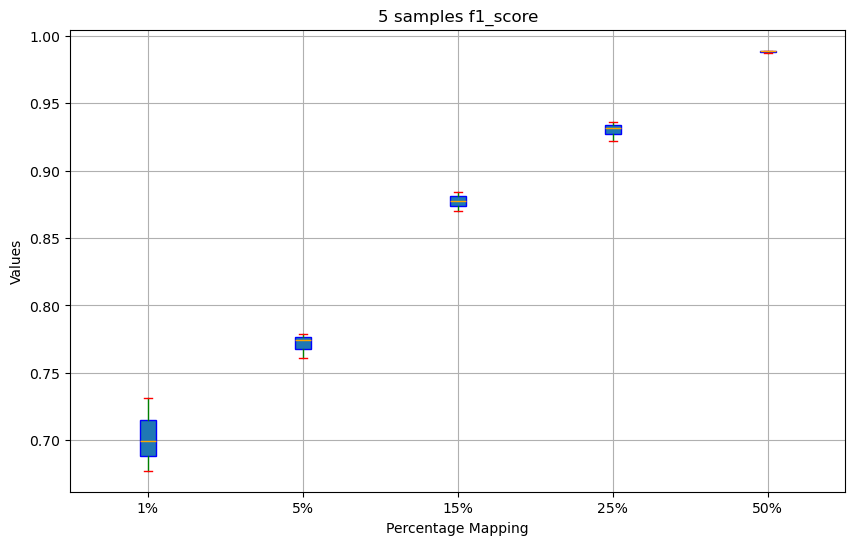

------------------------------------------------------------------


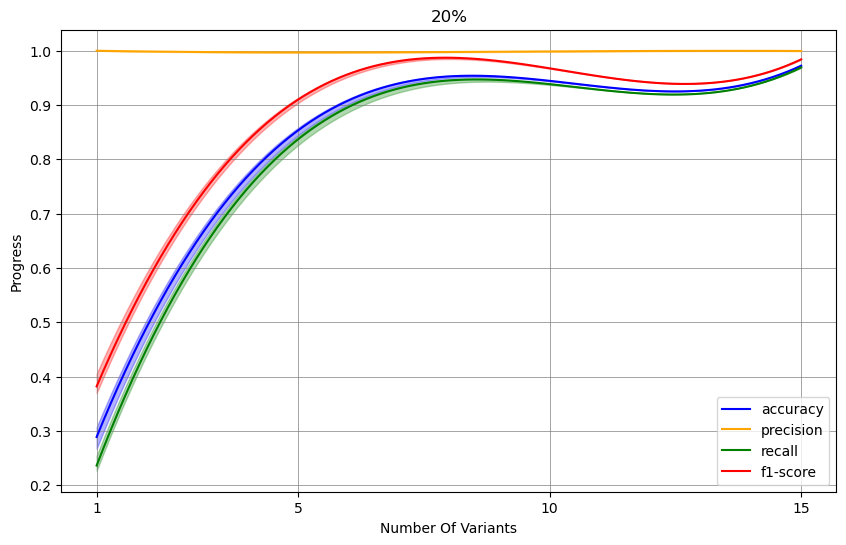

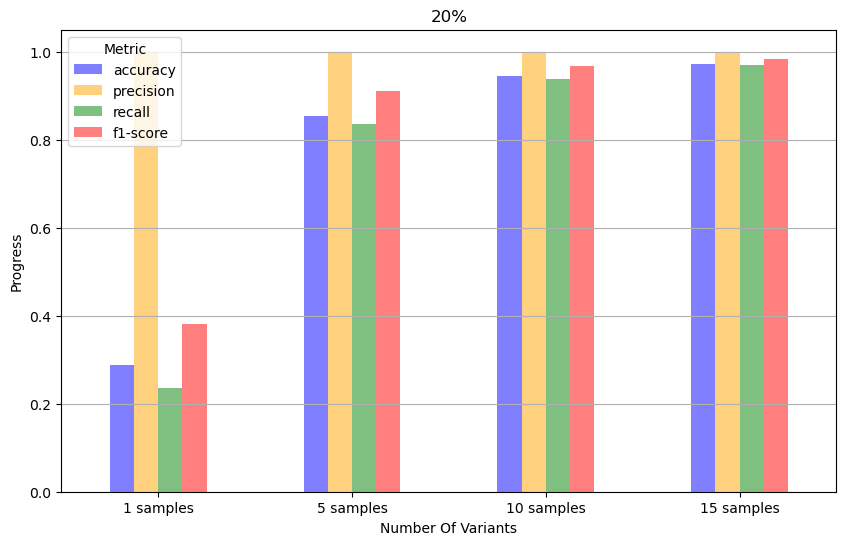

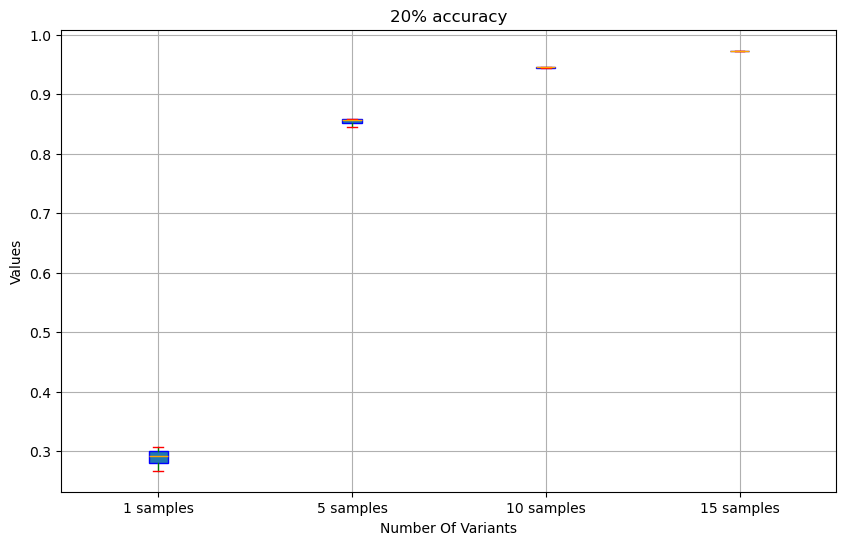

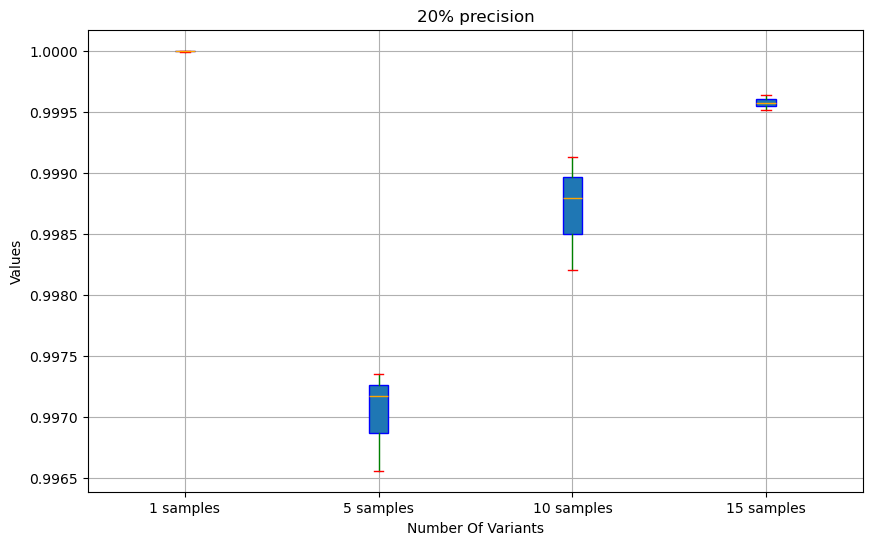

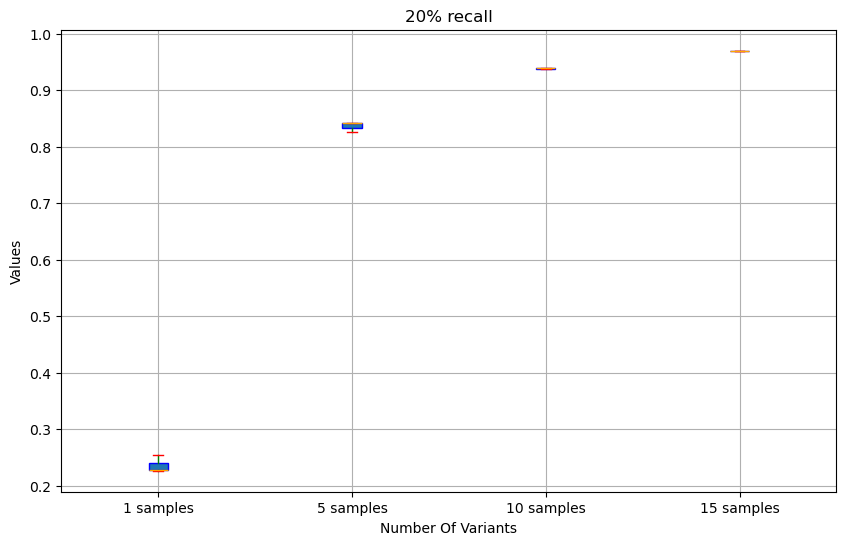

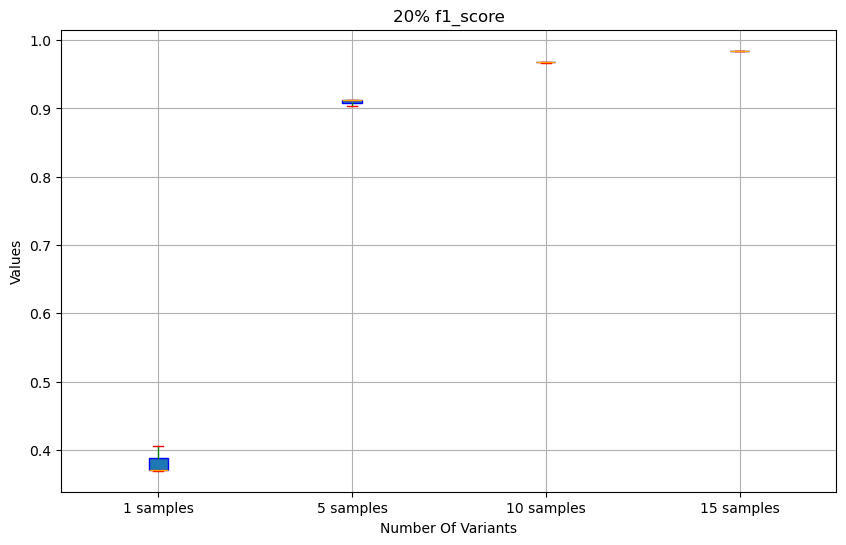

------------------------------------------------------------------


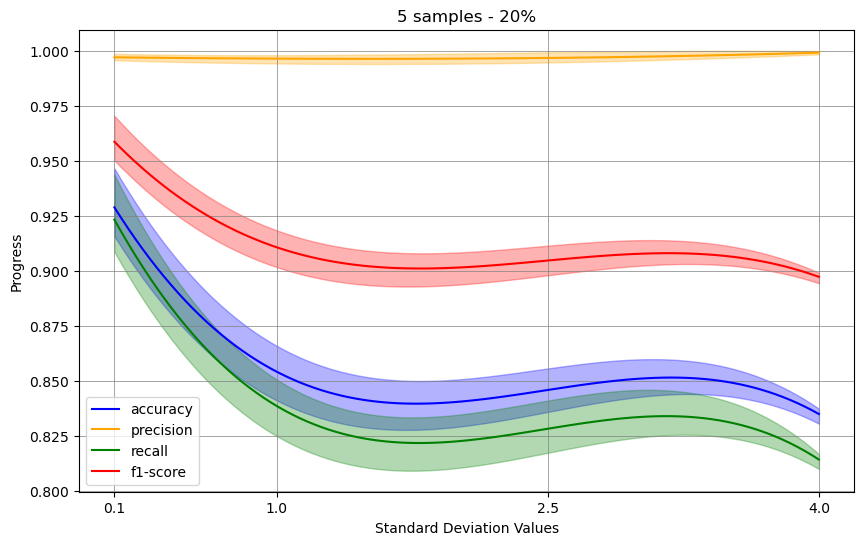

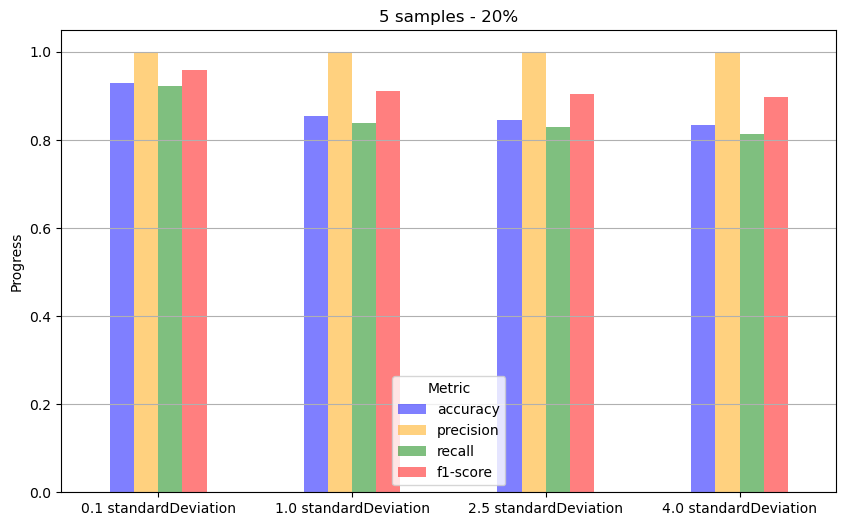

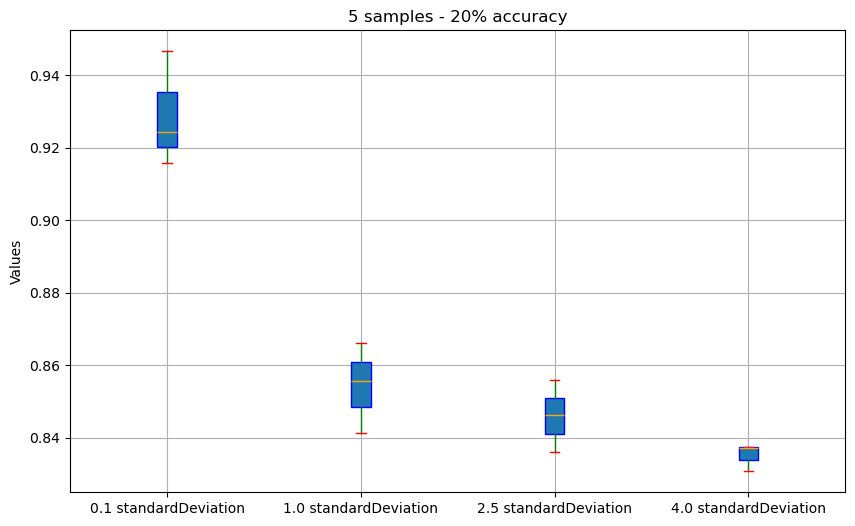

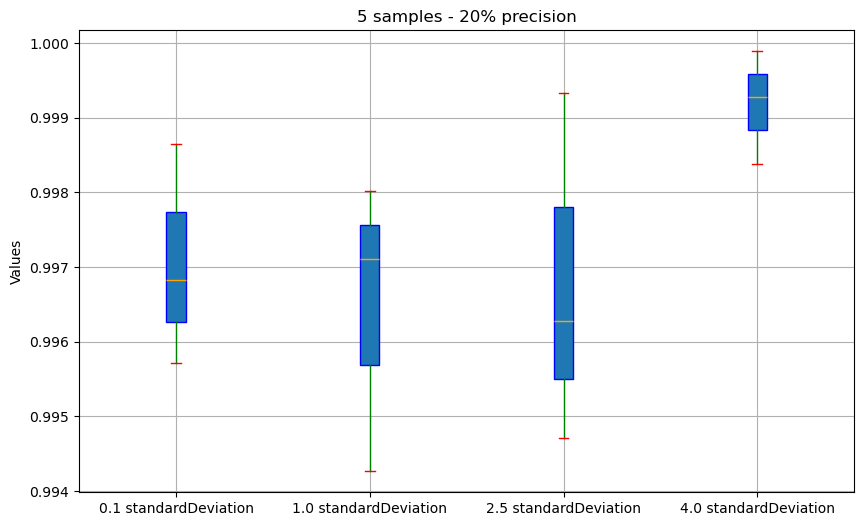

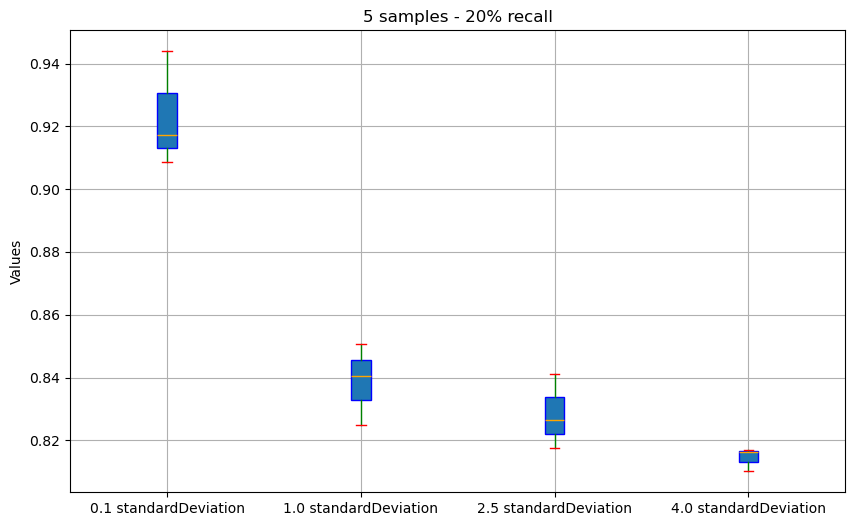

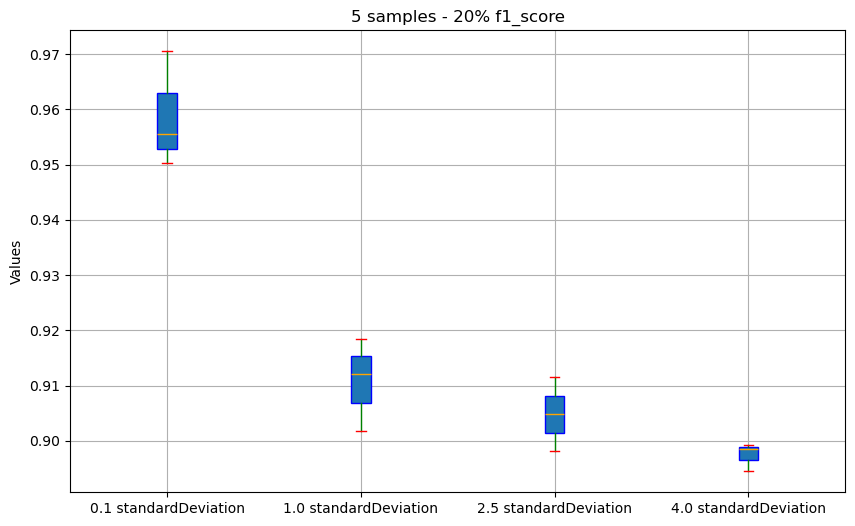

------------------------------------------------------------------


In [6]:
for sample_size, sampleData in dataInSamplesrq1.items():
    plotLines(experimentrq1, sampleData['average_df'], sampleData['accuracy_df'], sampleData['precision_df'], sampleData['recall_df'], sampleData['f1_score_df'], title=sample_size)
    plotBars(sampleData['average_df'].T, title=sample_size)
    plotBoxs(sampleData['accuracy_df'], title=sample_size+' accuracy')
    plotBoxs(sampleData['precision_df'], title=sample_size+' precision')
    plotBoxs(sampleData['recall_df'], title=sample_size+' recall')
    plotBoxs(sampleData['f1_score_df'], title=sample_size+' f1_score')
    print('------------------------------------------------------------------')
for percentage_size, percentageData in dataInSamplesrq2.items():
    plotLines(experimentrq2, percentageData['average_df'], 
              percentageData['accuracy_df'], percentageData['precision_df'], 
              percentageData['recall_df'], percentageData['f1_score_df'], 
              title=percentage_size, rq=2)
    plotBars(percentageData['average_df'].T, title=percentage_size, rq=2)
    plotBoxs(percentageData['accuracy_df'], title=percentage_size+' accuracy', rq=2)
    plotBoxs(percentageData['precision_df'], title=percentage_size+' precision', rq=2)
    plotBoxs(percentageData['recall_df'], title=percentage_size+' recall', rq=2)
    plotBoxs(percentageData['f1_score_df'], title=percentage_size+' f1_score', rq=2)
    print('------------------------------------------------------------------')

for s_p_size, s_p_Data in dataInSamplesrq3.items():
    plotLines(experimentrq3, s_p_Data['average_df'], 
              s_p_Data['accuracy_df'], s_p_Data['precision_df'], 
              s_p_Data['recall_df'], s_p_Data['f1_score_df'], 
              title=s_p_size, rq=3)
    plotBars(s_p_Data['average_df'].T, title=s_p_size, rq=3)
    plotBoxs(s_p_Data['accuracy_df'], title=s_p_size+' accuracy', rq=3)
    plotBoxs(s_p_Data['precision_df'], title=s_p_size+' precision', rq=3)
    plotBoxs(s_p_Data['recall_df'], title=s_p_size+' recall', rq=3)
    plotBoxs(s_p_Data['f1_score_df'], title=s_p_size+' f1_score', rq=3)
    print('------------------------------------------------------------------')

In [3]:
# # Parsing json data
# def parseDataRQ1(data):
#     experiment = data.pop('experement_properties')
#     dataInSamples = {}
#     for sample, sample_data in data.items():
#         # Extract accuracy data
#         accuracy_data = {percentage: [runs["accuracy"]/100 for runs in runs_data.values()] for percentage, runs_data in sample_data.items()}
#         accuracy_df = pd.DataFrame(accuracy_data, index=list(sample_data.values())[0].keys())

#         # Extract precision data
#         precision_data = {percentage: [runs["precision"] for runs in runs_data.values()] for percentage, runs_data in sample_data.items()}
#         precision_df = pd.DataFrame(precision_data, index=list(sample_data.values())[0].keys())

#         # Extract recall data
#         recall_data = {percentage: [runs["recall"] for runs in runs_data.values()] for percentage, runs_data in sample_data.items()}
#         recall_df = pd.DataFrame(recall_data, index=list(sample_data.values())[0].keys())
        
#         # Extract f1-score data
#         f1_data = {percentage: [runs["f1-score"] for runs in runs_data.values()] for percentage, runs_data in sample_data.items()}
#         f1_score_df = pd.DataFrame(f1_data, index=list(sample_data.values())[0].keys())
        
#         # Calculate averages
#         averages = {}
#         for percentage, runs_data in sample_data.items():
#             avg_accuracy = sum(run_data["accuracy"] for run_data in runs_data.values()) / len(runs_data) / 100
#             avg_precision = sum(run_data["precision"] for run_data in runs_data.values()) / len(runs_data)
#             avg_recall = sum(run_data["recall"] for run_data in runs_data.values()) / len(runs_data)
#             avg_f1_score = sum(run_data["f1-score"] for run_data in runs_data.values()) / len(runs_data)
#             averages[percentage] = {"accuracy": avg_accuracy, "precision": avg_precision, "recall": avg_recall, "f1-score": avg_f1_score}

#         average_df = pd.DataFrame(averages)
#         dataInSamples[sample]= {'average_df':average_df, 'accuracy_df':accuracy_df, 'precision_df':precision_df, 'recall_df':recall_df, 'f1_score_df':f1_score_df}
#     return experiment, dataInSamples


# def parseDataRQ2(data):
#     experiment = data.pop('experement_properties')
#     dataInPercentage = {}
#     for percentage in ast.literal_eval(experiment['Percentage scenarios']):
#         average_df = pd.DataFrame(index=['accuracy','precision','recall','f1-score'])
#         accuracy_df = pd.DataFrame(index=[f"{i}th run" for i in range(1, (experiment['Runs']) + 1)])
#         precision_df = pd.DataFrame(index=[f"{i}th run" for i in range(1, (experiment['Runs']) + 1)])
#         recall_df = pd.DataFrame(index=[f"{i}th run" for i in range(1, (experiment['Runs']) + 1)])
#         f1_score_df = pd.DataFrame(index=[f"{i}th run" for i in range(1, (experiment['Runs']) + 1)])
#         for sample, sample_data in data.items():
#             percentagedata = sample_data[str(percentage)+'%']
#             # print(percentagedata)
#             acc = [ rundata['accuracy']/100 for run, rundata in percentagedata.items()]
#             prec = [ rundata['precision'] for run, rundata in percentagedata.items()]
#             recal = [ rundata['recall'] for run, rundata in percentagedata.items()]
#             f1 = [ rundata['f1-score'] for run, rundata in percentagedata.items()]
#             accuracy_df[sample] = acc
#             precision_df[sample] = prec
#             recall_df[sample] = recal
#             f1_score_df[sample] = f1
#             average_df[sample] = [(sum(acc) / len(acc)), (sum(prec) / len(prec)), (sum(recal) / len(recal)), (sum(f1) / len(f1))]

#         dataInPercentage[str(percentage)+'%'] = {'average_df':average_df, 'accuracy_df':accuracy_df, 'precision_df':precision_df, 'recall_df':recall_df, 'f1_score_df':f1_score_df}
#     return experiment, dataInPercentage




# parent_directory = os.path.dirname(os.getcwd())
# with open(parent_directory+'/data/result/experiment_result.json', 'r') as file:
#     data = json.load(file)

# parsedData, config = parseData(data)
# avaragedData = averagingRuns(parsedData)